### Рубежный контроль №1

### Утробин Егор Эдуардович, ИУ5-61Б, Вариант 19. Задание 3.

#### Задача №3.
Для заданного набора данных произведите масштабирование данных (для одного признака) и преобразование категориальных признаков в количественные двумя способами (label encoding, one hot encoding) для одного признака. Какие методы Вы использовали для решения задачи и почему?
#### Дополнение для ИУ5-61Б 
Для пары произвольных колонок данных построить график "Диаграмма рассеяния".

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import *

## Датасет

In [2]:
data = pd.read_csv('marvel-wikia-data.csv', sep=",")

In [3]:
# первые строки
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [4]:
# типы колонок
data.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
Year                float64
dtype: object

## Масштабирование

In [5]:
# Статистика датасета
data.describe()

,page_id,APPEARANCES,Year
count,16376.000000,15280.000000,15561.000000
mean,300232.082377,17.033377,1984.951803
std,253460.403399,96.372959,19.663571
min,1025.000000,1.000000,1939.000000
25%,28309.500000,1.000000,1974.000000
50%,282578.000000,3.000000,1990.000000
75%,509077.000000,8.000000,2000.000000
max,755278.000000,4043.000000,2013.000000


### Масштабирование на основе MinMax - значения лежат в диапазоне от 0 до 1

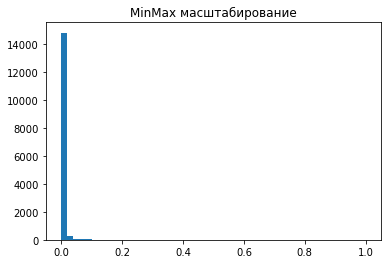

In [6]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['APPEARANCES']])
plt.hist(sc1_data, 50)
plt.title("MinMax масштабирование")
plt.show()

### Z оценка - значения лежат в диапазоне от -3 до 3

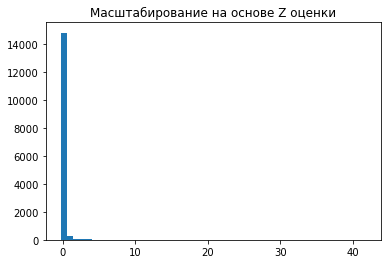

In [7]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['APPEARANCES']])
plt.hist(sc2_data, 50)
plt.title("Масштабирование на основе Z оценки")
plt.show()

## Преобразование категориальных признаков в количественные

### Label encoding

In [8]:
# обработка пропусков с заменой на "Unknown"
imp2 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Unknown')
data['EYE'] = imp2.fit_transform(data[['EYE']])

#Уникальные типы
types = data['EYE']
types.unique()

array(['Hazel Eyes', 'Blue Eyes', 'Brown Eyes', 'Green Eyes', 'Grey Eyes',
       'Yellow Eyes', 'Gold Eyes', 'Red Eyes', 'Black Eyeballs',
       'Amber Eyes', 'Variable Eyes', 'Unknown', 'Black Eyes',
       'White Eyes', 'Orange Eyes', 'Silver Eyes', 'Purple Eyes',
       'Pink Eyes', 'One Eye', 'Violet Eyes', 'Multiple Eyes',
       'Magenta Eyes', 'Yellow Eyeballs', 'No Eyes', 'Compound Eyes'],
      dtype=object)

In [9]:
#label encoding
le = LabelEncoder()
data_le = le.fit_transform(types)

Результат

In [10]:
np.unique(data_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

Обратное преобразование

In [11]:
le.inverse_transform(data_le)

array(['Hazel Eyes', 'Blue Eyes', 'Blue Eyes', ..., 'Black Eyes',
       'Unknown', 'Unknown'], dtype=object)

### One hot encoding

In [12]:
pd.get_dummies(data['EYE']).head()

,Amber Eyes,Black Eyeballs,Black Eyes,Blue Eyes,Brown Eyes,Compound Eyes,Gold Eyes,Green Eyes,Grey Eyes,Hazel Eyes,...,Pink Eyes,Purple Eyes,Red Eyes,Silver Eyes,Unknown,Variable Eyes,Violet Eyes,White Eyes,Yellow Eyeballs,Yellow Eyes
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


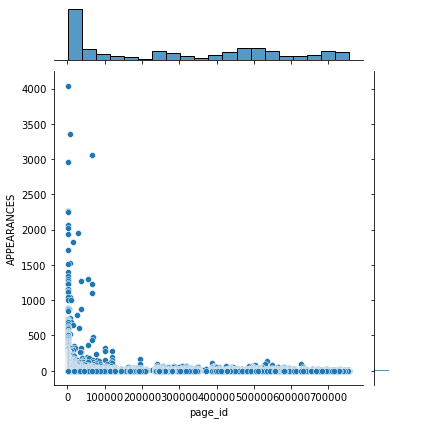

In [13]:
sns.jointplot(x = "page_id", y = "APPEARANCES", kind="scatter", data = data)

<AxesSubplot:xlabel='page_id', ylabel='APPEARANCES'>

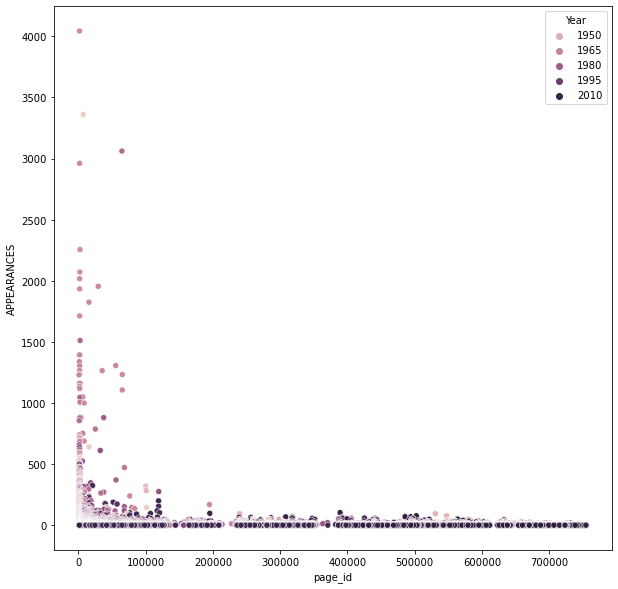

In [14]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='page_id', y='APPEARANCES', data=data, hue='Year')